# COGS 108 - Final Project 

# Overview

This study investigates the influence of scheduling on the inspection accuracy of restaurants. The goal is to try to find ways to improve how local government inspectors handle the difficult task of ensuring that restaurants prepare food safely. To do so, we examine the effects of conducting more than one inspection throughout the day, and the number of violations found. 

# Name & PID

- Name: Mariana Ayala 
- PID: Mariana1353

# Research Question

Is there a relationship between the number of violations found and the inspection number? 

How scheduling affects the citations of violations and therefore the reliability of the inspection?


## Background and Prior Work

The United States spends a large amount of money to prevent foodborne illness outbreaks. According to the Centers for Disease Control and Prevention (CDC), “each year, approximately 48 million people get sick, 128,000 are hospitalized, and 3,000 die of foodborne diseases” (“Burden of Foodborne Illness: Findings,” 2018). Food safety inspections are administered by the government or local agents to prevent restaurant-associated foodborne outbreaks and ensure that food is prepared and handled safely. Inspectors use an ABC grading scheme to classify restaurants based on risk. Grade ‘A’ means the restaurant complied with each of the inspection items. Grade ‘B’ restaurants met with most items but violated one of five specific items (i.e., floors, walls, and ceilings), and grade ‘C’ restaurants failed to meet either standard. Restaurant owners are mandated to display their letter scores to ensure that consumers are informed of the food’s safety. Restaurants receiving a passing grade have no critical or severe violations, while those failing have critical or severe violations that are not correctable during an inspection. These efforts have shown to incentivize restaurants to reduce risks for foodborne illness.

In addition, a study conducted in Philadelphia found that “changes in the targeting and scheduling of food safety inspections could improve the efficiency of detecting violations” (Leinwand, S. E., Glanz, K., Keenan, B. T., & Branas, C. C. (2017). Importantly, researchers also discovered chain restaurants have fewer violations than non-chain restaurants. We know that a variety of factors influence restaurant inspections’ efficacy and reliability in preventing foodborne disease. Therefore, the study aims to determine when should inspections take place to reduce food safety risks in North Carolina and how scheduling affects the worker’s behavior and the number of violations found? For instance, a study in Tennessee by Jones et al., on restaurant inspection scores and foodborne disease found that “routine restaurant inspection scores varied substantially over time, by region, and by the person performing the inspection” (2004).

References (include links):
- 1) https://journals.sagepub.com/doi/full/10.1177/0033354916687741#articleCitationDownloadContainer
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/
- 3) https://www.cdc.gov/foodborneburden/2011-foodborne-estimates.html
- 4) https://www.yalelawjournal.org/pdf/1120_mparaxzn.pdf

# Hypothesis


I hypothesize that inspectors will record fewer violations as they spend more time conducting inspections throughout the day. This is because inspecting causes fatigue that decays inspectors’ vigilance and leads them to cite fewer violations.


# Dataset(s)

**Data set description:**

- Dataset Name: Inspections.csv
- Number of observations: 18466


This data set is derived from inspections of restaurants and other food establishments in North Carolina. However, for the purpose of this study, we will focus only on restaurant facilities in North Carolina. 

It provides information such as the exact number and the type of violations discovered in each restaurant. The data is semistructured data, and needs to be filtered, clean, and organized in a relational database. Every observation of a variable is stored in a different row. Observations include facility type, violation code, grade, and inspection number, and the number of critical violations. 

 

# Setup

## Importing Packages

In [1]:
# Import libraries 
import pandas as pd
import numpy as np

# Import seaborn & stats
import seaborn as sns
sns.set(style="white", font_scale=2)
import scipy.stats as stats

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# Statmodels & patsy
import patsy
import statsmodels.api as sm

#import string & csv
import csv
import string



## Converting CSV File Into Pandas DataFrame

To use the data, we have to read it in as a Dataframe. First, we load the inspections.csv file into a pandas DataFrame named df. It should have 18466 rows and 36 columns. 


In [2]:
# Load a csv file 
df = pd.read_csv('inspections.csv')

# Data Cleaning

### Exploring the data


After reading in a dataset, It is important to check tha type of information is stored in each column. To check the values store use **describe and dtypes attribute.**

In [3]:
# Summary statistics
df.describe()

,hsisid,days_from_open_date,x,y,zip,inspection_num,inspector_id,days_since_previous_inspection,score,num_critical,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
count,1.846600e+04,18466.000000,18466.000000,18466.000000,18466.000000,18466.000000,18461.000000,15421.000000,18466.000000,18466.000000,18466.000000,15421.000000,15421.000000,15421.000000,15421.000000,18460.000000,18460.000000,1.846000e+04,1.846000e+04,18466.000000
mean,4.092039e+09,3262.693274,-78.674401,35.802919,27577.605816,4.191216,13.751151,192.886259,96.235324,2.844308,5.161432,2.922962,5.257052,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,0.818044
std,6.235295e+04,2569.271482,0.118368,0.083128,44.168085,2.578251,9.350358,83.476608,2.654203,2.809652,3.679451,2.831160,3.738389,2.320130,3.201003,1.563459,2.100702,5.212564e+04,6.600398e+04,0.385819
min,4.092010e+09,-160.000000,-78.941986,35.539550,27501.000000,1.000000,1.000000,0.000000,72.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,4.092010e+09,4.092010e+09,0.000000
25%,4.092015e+09,1069.000000,-78.774820,35.763133,27529.000000,2.000000,6.000000,140.000000,95.000000,1.000000,3.000000,1.000000,3.000000,1.600000,3.000000,2.190000,4.294444,4.092014e+09,4.092014e+09,1.000000
50%,4.092016e+09,2733.000000,-78.668185,35.797836,27603.000000,4.000000,11.000000,182.000000,97.000000,2.000000,4.000000,2.000000,4.000000,2.800000,5.000000,3.167976,5.400000,4.092016e+09,4.092016e+09,1.000000
75%,4.092022e+09,4884.750000,-78.600152,35.856202,27610.000000,6.000000,22.000000,228.000000,98.000000,4.000000,7.000000,4.000000,7.000000,4.428571,7.250000,4.273333,6.800000,4.092021e+09,4.092021e+09,1.000000
max,4.092300e+09,10947.000000,-78.271228,36.051133,28587.000000,16.000000,32.000000,1083.000000,100.000000,23.000000,33.000000,23.000000,33.000000,23.000000,27.000000,10.518095,16.333333,4.092300e+09,4.092300e+09,1.000000


In [4]:
# see types for each variable
df.dtypes

hsisid                                     int64
date                                      object
name                                      object
address1                                  object
address2                                  object
city                                      object
state                                     object
postalcode                                object
phonenumber                               object
restaurantopendate                        object
days_from_open_date                        int64
facilitytype                              object
x                                        float64
y                                        float64
geocodestatus                             object
zip                                        int64
type                                      object
description                               object
inspectedby                               object
inspection_num                             int64
inspector_id        

### Selecting Columns

We're only interested in working with some columns in this study, so it's necessary to filter the data. To just get the data we're interested in we're going to specify the columns: 

It's important to note that we remove all personal information except for the *inspector_id* since we want to check if more critical violations were found during the inspection. 



In [5]:
# specify which columns to include
# columns of interest 
select_df = df[['inspector_id', 'inspection_num', 'num_critical','score','city']]
select_df.head()

,inspector_id,inspection_num,num_critical,score,city
0,27.0,1,9,96.0,raleigh
1,7.0,1,0,98.0,raleigh
2,3.0,1,4,97.0,raleigh
3,24.0,1,2,99.0,cary
4,7.0,1,2,97.0,zebulon


## Missing Data 

Before proceeding with the analysis, we need to check our data for **missing values** and understand why these values are missing.

There are many reasons data might contain missing values. Here the missing values originate possibly from inspectors who did not want to reveal their names and id. 

Removing observations with missing values can produce a bias in the model. So we have to be careful before removing observations.

In [6]:
# number of missing values by column
select_df.isnull().sum()


inspector_id      5
inspection_num    0
num_critical      0
score             0
city              0
dtype: int64

### Droping Missing values

As mention already, it is **not** always appropriate to drop missing values because it can lead to conclusions based on the assumption of a complete data set. 

In this case, however, the best approach is to simply omit those cases and analyze the remaining data.  To this we'll use the drop method: 

In [7]:
# Drop missing values 
new_data = select_df.dropna()


In [8]:
# check if the missing values were removed 
new_data.isnull().sum()


inspector_id      0
inspection_num    0
num_critical      0
score             0
city              0
dtype: int64

## Arrage Columns

In [9]:
df_new = new_data.sort_values('inspection_num', ascending=False)
df_new = new_data.reset_index(drop = True)


In [10]:
# take a look at the first few rows
df_new.head()

,inspector_id,inspection_num,num_critical,score,city
0,27.0,1,9,96.0,raleigh
1,7.0,1,0,98.0,raleigh
2,3.0,1,4,97.0,raleigh
3,24.0,1,2,99.0,cary
4,7.0,1,2,97.0,zebulon


# Data Analysis & Results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6cee7c978>]],
      dtype=object)

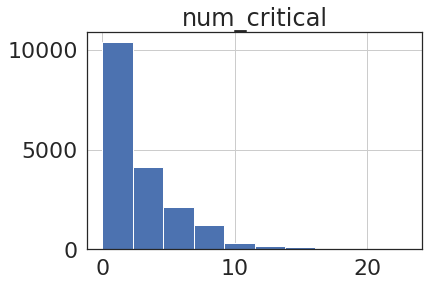

In [11]:
# Histogram of the number of critial violations 
df_new.hist(column='num_critical')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6ccd670f0>]],
      dtype=object)

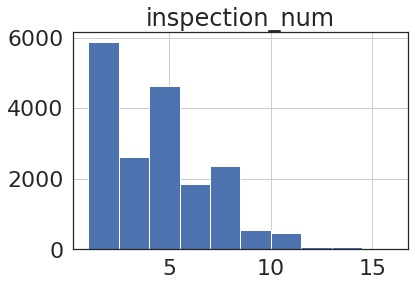

In [12]:
# Histogram of the number of inspections 
df_new.hist(column='inspection_num')

# Ethics & Privacy

To ensure the research does not cause undue harm, it is essential to consider the impact this research will have on the restaurants and the public. The data should be carefully analyzed to avoid making misleading allegations, and it must promote reliability and validity. Therefore, the limitations of this research must be considered before making assertions. 
 
I must ensure to protect the privacy of the owners of the restaurants and their employees. However, I must also note there is no permission required since the data is available to the public to guarantee that consumers are safe, and there is no breach of privacy.

Importantly, as an analyst, I refrain from biases and from being unethical. The study aims to enhance the restaurant health inspection process for North carolina, specifically Raleigh City and not gain any profits from it except for a deeper understanding of the existing inspections system. 

# Conclusion & Discussion

We hope that these findings are taken into account to increase inspector effectiveness when prioritizing establishments for inspection